In [23]:
import pandas as pd
from google.colab import files

# Upload the INFORM file (e.g., INFORM_Risk_2025_v070.xlsx)
print("Upload INFORM file:")
uploaded_inform = files.upload()

# Get the filename from the uploaded dictionary
inform_file_path = list(uploaded_inform.keys())[0]

# List available sheet names
xls = pd.ExcelFile(inform_file_path)
all_sheets = xls.sheet_names
print("Available sheet names in INFORM file:")
print(all_sheets)

# Fuzzy matching: select the sheet that contains 'inform risk' (ignoring case)
target_sheets = [sheet for sheet in all_sheets if "inform risk" in sheet.lower()]
if not target_sheets:
    raise ValueError("No sheet found with 'inform risk' in its name!")
else:
    chosen_sheet = target_sheets[0]
    print("Selected sheet for INFORM risk scores:", chosen_sheet)

# Read the INFORM risk sheet using row 0 as header and skip row 1 (metadata)
inform_scores = pd.read_excel(inform_file_path, sheet_name=chosen_sheet, header=0, skiprows=[1])

# Load other sheets (assuming these sheets don't require skipping rows)
hazard_exposure = pd.read_excel(inform_file_path, sheet_name="Hazard & Exposure")
vulnerability   = pd.read_excel(inform_file_path, sheet_name="Vulnerability")
coping          = pd.read_excel(inform_file_path, sheet_name="Lack of Coping Capacity")

# Check the columns in the INFORM DataFrame
print("\nUpdated columns in INFORM data:")
print(inform_scores.columns.tolist())

# Preview the first few rows to verify
print("\nPreview of INFORM Risk Scores:")
print(inform_scores.head())


Upload INFORM file:


Saving INFORM_Risk_2025_v070.xlsx to INFORM_Risk_2025_v070.xlsx
Available sheet names in INFORM file:
['About', 'INFORM Risk 2025 (a-z)', 'Hazard & Exposure', 'Vulnerability', 'Lack of Coping Capacity', 'Indicator Data', 'Population Data', 'Indicator Date', 'Indicator Date hidden', 'Indicator Date hidden2', 'Indicator Source', 'Indicator Data imputation', 'Imputed and missing data hidden', 'Lack of Reliability Index', 'Indicator Metadata', 'Regions']
Selected sheet for INFORM risk scores: INFORM Risk 2025 (a-z)


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)



Updated columns in INFORM data:
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41']

Preview of INFORM Risk Scores:
    Unnamed: 0 Unnamed: 1 Unnamed: 2            Unnamed: 3 Unnamed: 4  \
0        (a-z)      (a-z)     (0-10)  (Very Low-Very High)    (1-191)   
1  Afghanistan        AFG        7.8             Very High          7   
2      Albania        ALB        2.9                   Low        126   
3      Algeria        

In [24]:
# Step 2: Upload and load the EM-DAT data

# Upload the EM-DAT file (select your public_emdat_custom_request_2025...xlsx file)
print("Upload EM-DAT file:")
uploaded_emdat = files.upload()  # e.g., public_emdat_custom_request_2025-02-14_7e6ca5c3-c7ec-4190-b6c8-ff8ea20cd69e.xlsx

# Get the filename from the uploaded dictionary
emdat_file_path = list(uploaded_emdat.keys())[0]

# List available sheet names in the EM-DAT file
xls_emdat = pd.ExcelFile(emdat_file_path)
print("Available sheet names in EM-DAT file:")
print(xls_emdat.sheet_names)

# Load the EM-DAT data from the "EM-DAT Data" sheet
emdat_sheet_name = "EM-DAT Data"
emdat_data = pd.read_excel(emdat_file_path, sheet_name=emdat_sheet_name)
print("\nPreview of EM-DAT Disaster Data:")
print(emdat_data.head())

# Convert the 'Entry Date' column to datetime and extract the year into a new 'Year' column
emdat_data["Entry Date"] = pd.to_datetime(emdat_data["Entry Date"], errors="coerce")
emdat_data["Year"] = emdat_data["Entry Date"].dt.year

# Filter EM-DAT data for the period 2000-2024
emdat_filtered = emdat_data[(emdat_data["Year"] >= 2000) & (emdat_data["Year"] <= 2024)]
print("\nEM-DAT data after filtering (years 2000-2024):")
print(emdat_filtered.head())


Upload EM-DAT file:


Saving public_emdat_custom_request_2025-02-14_7e6ca5c3-c7ec-4190-b6c8-ff8ea20cd69e.xlsx to public_emdat_custom_request_2025-02-14_7e6ca5c3-c7ec-4190-b6c8-ff8ea20cd69e.xlsx
Available sheet names in EM-DAT file:
['EM-DAT Data', 'EM-DAT Info']

Preview of EM-DAT Disaster Data:
          DisNo. Historic Classification Key Disaster Group  \
0  1900-0003-USA      Yes    nat-met-sto-tro        Natural   
1  1900-0005-USA      Yes    tec-ind-fir-fir  Technological   
2  1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural   
3  1900-0007-JAM      Yes    nat-bio-epi-vir        Natural   
4  1900-0008-JPN      Yes    nat-geo-vol-ash        Natural   

     Disaster Subgroup      Disaster Type   Disaster Subtype External IDs  \
0       Meteorological              Storm   Tropical cyclone          NaN   
1  Industrial accident  Fire (Industrial)  Fire (Industrial)          NaN   
2         Hydrological              Flood    Flood (General)          NaN   
3           Biological           Epide

In [25]:
# Step 3: Aggregate EM-DAT Metrics by Country

# For troubleshooting, print all column names from the EM-DAT data:
print("Columns in EM-DAT data:")
print(emdat_data.columns.tolist())

# Calculate disaster frequency per country using the "ISO" code (adjust if you use a different column)
disaster_counts = emdat_filtered.groupby("ISO").size().reset_index(name="Disaster Frequency")

# Choose the impact metric:
# Check if 'Total Deaths' or 'Total Affected' is available.
if "Total Deaths" in emdat_filtered.columns:
    metric_column = "Total Deaths"
elif "Total Affected" in emdat_filtered.columns:
    metric_column = "Total Affected"
else:
    metric_column = None
    print("Neither 'Total Deaths' nor 'Total Affected' found in the dataset.")

# If an impact metric column was found, aggregate it per country
if metric_column:
    impact_metric = emdat_filtered.groupby("ISO")[metric_column].sum().reset_index()
    impact_metric = impact_metric.rename(columns={metric_column: "Impact Metric"})
else:
    # If no impact metric is found, create an empty DataFrame or handle as needed
    impact_metric = pd.DataFrame()

# Merge the disaster frequency and impact metric metrics
emdat_metrics = pd.merge(disaster_counts, impact_metric, on="ISO", how="outer")
print("\nAggregated EM-DAT Metrics:")
print(emdat_metrics.head())


Columns in EM-DAT data:
['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update', 'Year']

Aggregated EM-DAT Metrics:
   ISO  Disaster Frequency  Impact Metric
0  AFG                 283        33122.0
1  AGO                 123         7889.0
2  AIA   

In [27]:
# After reading the INFORM sheet:
inform_scores = pd.read_excel(inform_file_path, sheet_name=chosen_sheet, header=0, skiprows=[1])

# Clean column names by stripping whitespace and converting to string
inform_scores.columns = [str(col).strip() for col in inform_scores.columns]

# Print the column names to verify they are as expected
print("Cleaned columns in INFORM data:")
print(inform_scores.columns.tolist())


Cleaned columns in INFORM data:
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41']


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [28]:
import pandas as pd
from google.colab import files

# Upload the INFORM file (if not already uploaded)
print("Upload INFORM file:")
uploaded_inform = files.upload()  # e.g., INFORM_Risk_2025_v070.xlsx
inform_file_path = list(uploaded_inform.keys())[0]

# List available sheet names
xls = pd.ExcelFile(inform_file_path)
all_sheets = xls.sheet_names
print("Available sheet names in INFORM file:")
print(all_sheets)

# Use fuzzy matching to select the sheet that contains "inform risk"
target_sheets = [sheet for sheet in all_sheets if "inform risk" in sheet.lower()]
if not target_sheets:
    raise ValueError("No sheet found with 'inform risk' in its name!")
else:
    chosen_sheet = target_sheets[0]
    print("Selected sheet for INFORM risk scores:", chosen_sheet)

# Read the INFORM sheet using both header rows (row 0 and row 1)
# This creates a MultiIndex for columns.
inform_scores = pd.read_excel(inform_file_path, sheet_name=chosen_sheet, header=[0,1])

# Now, flatten the MultiIndex by taking the first level only.
# (Alternatively, you could combine levels if desired.)
inform_scores.columns = inform_scores.columns.get_level_values(0)

# Print the cleaned column names to verify
print("Cleaned columns in INFORM data:")
print(inform_scores.columns.tolist())

# Preview the INFORM data
print("\nPreview of INFORM Risk Scores:")
print(inform_scores.head())


Upload INFORM file:


Saving INFORM_Risk_2025_v070.xlsx to INFORM_Risk_2025_v070.xlsx
Available sheet names in INFORM file:
['About', 'INFORM Risk 2025 (a-z)', 'Hazard & Exposure', 'Vulnerability', 'Lack of Coping Capacity', 'Indicator Data', 'Population Data', 'Indicator Date', 'Indicator Date hidden', 'Indicator Date hidden2', 'Indicator Source', 'Indicator Data imputation', 'Imputed and missing data hidden', 'Lack of Reliability Index', 'Indicator Metadata', 'Regions']
Selected sheet for INFORM risk scores: INFORM Risk 2025 (a-z)
Cleaned columns in INFORM data:
['Unnamed: 0_level_0', 'Unnamed: 1_level_0', 'Unnamed: 2_level_0', 'Unnamed: 3_level_0', 'Unnamed: 4_level_0', 'Unnamed: 5_level_0', 'Unnamed: 6_level_0', 'Unnamed: 7_level_0', 'Unnamed: 8_level_0', 'Unnamed: 9_level_0', 'Unnamed: 10_level_0', 'Unnamed: 11_level_0', 'Unnamed: 12_level_0', 'Unnamed: 13_level_0', 'Unnamed: 14_level_0', 'Unnamed: 15_level_0', 'Unnamed: 16_level_0', 'Unnamed: 17_level_0', 'Unnamed: 18_level_0', 'Unnamed: 19_level_0', 

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [30]:
import pandas as pd

# ------------------------------
# Step A: Read and Clean the INFORM File
# ------------------------------
# Assume you have already uploaded the INFORM file and assigned its path to inform_file_path
# Also assume you've already selected the appropriate sheet via fuzzy matching (which returned chosen_sheet).
# For example, if your file is already uploaded and chosen_sheet is "INFORM Risk 2025 (a-z)":
inform_file_path = "INFORM_Risk_2025_v070.xlsx"  # adjust if needed
chosen_sheet = "INFORM Risk 2025 (a-z)"  # from previous fuzzy matching

# Read the sheet with the default header (this will use row 0 as header)
inform_raw = pd.read_excel(inform_file_path, sheet_name=chosen_sheet, header=0)

# The preview you provided shows that row 0 has the actual column names and row 1 has metadata.
# So, we set the header to row 0 manually and then drop the next row.
# First, let’s inspect the first few rows:
print("Raw INFORM data (first 3 rows):")
print(inform_raw.head(3))

# Now, reset the header to use the values in the first row:
inform_scores = inform_raw.copy()
inform_scores.columns = inform_scores.iloc[0].str.strip()  # use the first row values as column names and strip whitespace
# Drop the first row (which we have now promoted as header)
inform_scores = inform_scores.drop(inform_scores.index[0]).reset_index(drop=True)

# Check the cleaned column names
print("\nCleaned columns in INFORM data:")
print(inform_scores.columns.tolist())

# ------------------------------
# Step B: Merge with EM-DAT Metrics
# ------------------------------
# Assume that emdat_metrics has been prepared from previous steps and that it has a column "ISO".
# For example, emdat_metrics might look like:
#    ISO  Disaster Frequency  Impact Metric
# 0  AFG                 283        33122.0
# 1  AGO                 123         7889.0
# ...
#
# We now merge using INFORM's "ISO3" column and EM-DAT metrics' "ISO" column.
if "ISO3" not in inform_scores.columns:
    raise KeyError("Column 'ISO3' not found in the INFORM data. Check the cleaned column names above.")
else:
    print("\nFound 'ISO3' in INFORM data. Proceeding to merge.")

# For merging, make sure that the keys are string values (strip if necessary)
inform_scores["ISO3"] = inform_scores["ISO3"].astype(str).str.strip()
emdat_metrics["ISO"] = emdat_metrics["ISO"].astype(str).str.strip()

# Merge the two datasets using the ISO code columns
merged_df = pd.merge(inform_scores, emdat_metrics, left_on="ISO3", right_on="ISO", how="inner")

print("\nMerged DataFrame using ISO codes:")
print(merged_df.head())



Raw INFORM data (first 3 rows):
    Unnamed: 0 Unnamed: 1   Unnamed: 2            Unnamed: 3 Unnamed: 4  \
0      COUNTRY       ISO3  INFORM RISK            RISK CLASS       Rank   
1        (a-z)      (a-z)       (0-10)  (Very Low-Very High)    (1-191)   
2  Afghanistan        AFG          7.8             Very High          7   

                Unnamed: 5         Unnamed: 6 Unnamed: 7  Unnamed: 8  \
0  Lack of Reliability (*)  HAZARD & EXPOSURE    Natural  Earthquake   
1                   (0-10)             (0-10)     (0-10)      (0-10)   
2                   4.0199                7.6        5.6         8.8   

    Unnamed: 9  ... Unnamed: 32 Unnamed: 33     Unnamed: 34    Unnamed: 35  \
0  River Flood  ...         DRR  Governance  Infrastructure  Communication   
1       (0-10)  ...      (0-10)      (0-10)          (0-10)         (0-10)   
2          7.3  ...         7.1         8.7             6.8            6.7   

               Unnamed: 36            Unnamed: 37  \
0  Physical 

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Top 5 high-risk countries:
                      COUNTRY  INFORM RISK
158               South Sudan          8.5
156                   Somalia          8.4
187                     Yemen          8.2
38                   Congo DR          8.1
31   Central African Republic          8.1

Top 3 ISO codes for detailed analysis: ['SSD', 'SOM', 'YEM']


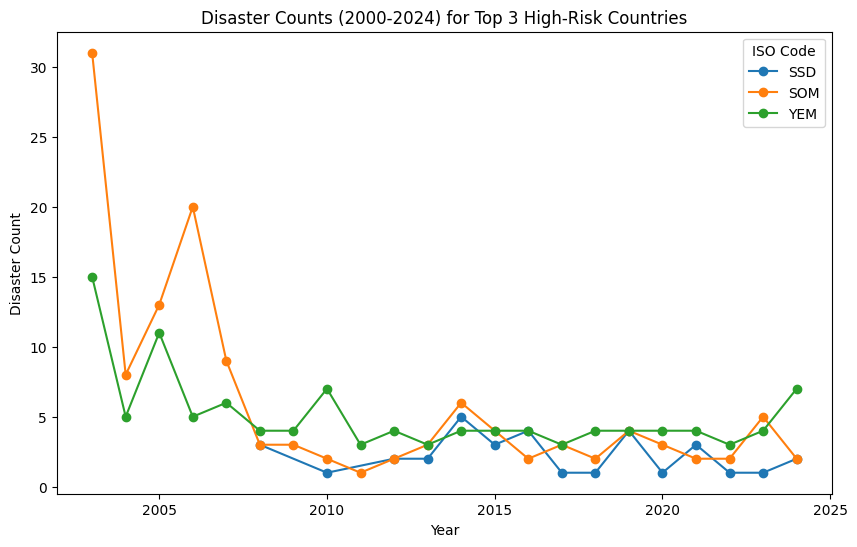

In [31]:
import matplotlib.pyplot as plt

# --- Q1: Identify Top 5 High-Risk Countries ---
# Ensure INFORM RISK is numeric
merged_df["INFORM RISK"] = pd.to_numeric(merged_df["INFORM RISK"], errors="coerce")
top5 = merged_df.sort_values("INFORM RISK", ascending=False).head(5)
print("Top 5 high-risk countries:")
print(top5[["COUNTRY", "INFORM RISK"]])

# --- Q1: Plot Disaster Counts for Top 3 Countries using EM-DAT Data ---
# Get the top 3 countries from INFORM risk ranking based on their ISO3 code
top3_iso = top5["ISO3"].head(3).tolist()
print("\nTop 3 ISO codes for detailed analysis:", top3_iso)

# From the previously loaded EM-DAT filtered dataset, group by Country ISO and Year
# (In our EM-DAT data, we have the column "ISO" which is the key used in aggregation)
top3_emdat = emdat_filtered[emdat_filtered["ISO"].isin(top3_iso)]
yearly_counts = top3_emdat.groupby(["ISO", "Year"]).size().reset_index(name="Count")

# Plot disaster count time series for each top country
plt.figure(figsize=(10, 6))
for iso in top3_iso:
    country_data = yearly_counts[yearly_counts["ISO"] == iso]
    plt.plot(country_data["Year"], country_data["Count"], marker="o", label=iso)
plt.xlabel("Year")
plt.ylabel("Disaster Count")
plt.title("Disaster Counts (2000-2024) for Top 3 High-Risk Countries")
plt.legend(title="ISO Code")
plt.show()



Correlation matrix:
                    INFORM RISK  Disaster Frequency  Impact Metric
INFORM RISK            1.000000            0.192634       0.040718
Disaster Frequency     0.192634            1.000000       0.728361
Impact Metric          0.040718            0.728361       1.000000


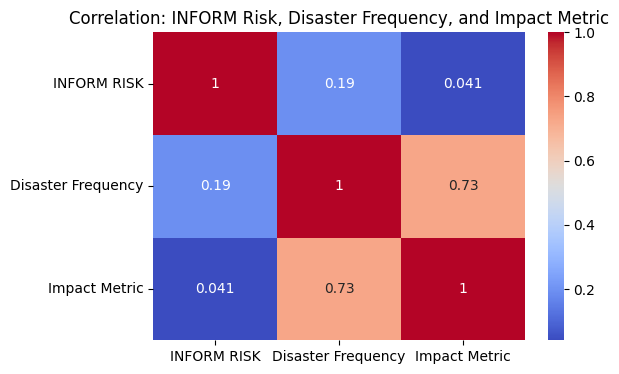

In [32]:
import seaborn as sns

# Select columns from the merged dataset. Adjust column names if needed.
corr_columns = ["INFORM RISK", "Disaster Frequency", "Impact Metric"]
corr_df = merged_df[corr_columns].dropna()

corr_matrix = corr_df.corr()
print("Correlation matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation: INFORM Risk, Disaster Frequency, and Impact Metric")
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression

# Select some key INFORM indicators as features – adjust based on your available columns.
# (For example, you might choose these three; you can include more if needed.)
feature_cols = ["HAZARD & EXPOSURE", "VULNERABILITY", "LACK OF COPING CAPACITY"]

# Convert to numeric (if not already), forcing errors to NaN and dropping them
for col in feature_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")

# Drop missing values for regression
regression_df = merged_df.dropna(subset=feature_cols + ["Disaster Frequency"])

# Define features and target
X = regression_df[feature_cols]
y = regression_df["Disaster Frequency"]

# Fit linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Add predicted disaster frequency to the DataFrame
regression_df["Predicted_Disaster_Frequency"] = reg_model.predict(X)

# Create a simple difference metric: difference between INFORM risk and actual disaster frequency
# (You might want to refine this metric; here we simply subtract)
regression_df["Diff"] = regression_df["INFORM RISK"] - regression_df["Disaster Frequency"]

# Identify 5 countries with high INFORM risk but low actual disasters.
anomalies = regression_df.sort_values("Diff", ascending=False).head(5)
print("Anomalous Countries (High risk, Low Disaster Frequency):")
print(anomalies[["COUNTRY", "ISO3", "INFORM RISK", "Disaster Frequency", "Predicted_Disaster_Frequency", "Diff"]])


Anomalous Countries (High risk, Low Disaster Frequency):
               COUNTRY ISO3  INFORM RISK  Disaster Frequency  \
23   Brunei Darussalam  BRN          2.3                   1   
98       Liechtenstein  LIE          1.0                   1   
175       Turkmenistan  TKM          3.1                   4   
90              Kuwait  KWT          2.7                   5   
87            Kiribati  KIR          3.6                   7   

     Predicted_Disaster_Frequency  Diff  
23                      46.088714   1.3  
98                      91.771619   0.0  
175                    163.938849  -0.9  
90                      58.566055  -2.3  
87                      34.769493  -3.4  


In [34]:
# Q1: Moving average forecasting for selected countries
selected_iso = top3_iso  # You may choose different countries if desired

forecast_results = {}
for iso in selected_iso:
    # Get yearly counts for this country from EM-DAT filtered data
    country_ts = emdat_filtered[emdat_filtered["ISO"] == iso].groupby("Year").size().sort_index()
    # Compute a 3-year moving average
    moving_avg = country_ts.rolling(window=3).mean()
    # Use the most recent moving average value as a forecast for 2025
    forecast_results[iso] = moving_avg.iloc[-1] if len(moving_avg) > 0 else None

print("Forecasted Disaster Frequency for 2025 (3-year moving average):")
print(forecast_results)


Forecasted Disaster Frequency for 2025 (3-year moving average):
{'SSD': np.float64(1.3333333333333333), 'SOM': np.float64(3.0), 'YEM': np.float64(4.666666666666667)}


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Q2: Create a target variable using the most common disaster type per country from EM-DAT.
disaster_target = emdat_filtered.groupby("ISO")["Disaster Type"].agg(lambda x: x.value_counts().idxmax()).reset_index()
# Rename key to "ISO" if necessary
# Merge with INFORM data based on ISO code (using INFORM's "ISO3")
classification_df = pd.merge(inform_scores, disaster_target, left_on="ISO3", right_on="ISO", how="inner")

# Select a set of INFORM indicators as features for forecasting disaster type.
# Adjust or extend this list as needed.
feature_cols_clf = ["HAZARD & EXPOSURE", "VULNERABILITY", "LACK OF COPING CAPACITY", "Projected Conflict Probability", "Economic Dependency"]

# Convert these features to numeric if not already
for col in feature_cols_clf:
    classification_df[col] = pd.to_numeric(classification_df[col], errors="coerce")

# Drop missing values for these columns and target
classification_df = classification_df.dropna(subset=feature_cols_clf + ["Disaster Type"])

features = classification_df[feature_cols_clf]
target = classification_df["Disaster Type"]

# Build a Random Forest Classifier to get feature importances
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(features, target)
importance_series = pd.Series(rf_clf.feature_importances_, index=feature_cols_clf)
top5_features = importance_series.sort_values(ascending=False).head(5)
print("Top 5 INFORM indicators for forecasting disaster types:")
print(top5_features)


Top 5 INFORM indicators for forecasting disaster types:
LACK OF COPING CAPACITY           0.262234
VULNERABILITY                     0.210166
HAZARD & EXPOSURE                 0.194738
Economic Dependency               0.194569
Projected Conflict Probability    0.138294
dtype: float64


In [37]:
# Check unique disaster types in your target variable
print("Unique classes in target:", target.unique())



Unique classes in target: ['Flood' 'Earthquake' 'Storm' 'Water' 'Extreme temperature' 'Epidemic'
 'Wildfire' 'Drought' 'Road' 'Explosion (Industrial)'
 'Fire (Miscellaneous)' 'Rail' 'Volcanic activity' 'Mass movement (wet)'
 'Air']


In [40]:
from sklearn.linear_model import LogisticRegressionCV

# Using Lasso for feature selection on the filtered data
lasso_clf = LogisticRegressionCV(cv=cv, penalty='l1', solver='liblinear', max_iter=1000)
lasso_clf.fit(features_filtered, target_filtered)

# Extract the absolute coefficient values
coef = pd.Series(np.abs(lasso_clf.coef_[0]), index=features_filtered.columns)
print("Lasso coefficients:")
print(coef)

# Try selecting features with coefficients above the median
selected_features_lasso = coef[coef > np.percentile(coef, 50)].index.tolist()
print("Lasso selected features (above median):", selected_features_lasso)

# If no features are selected, fallback to taking the top 2 features by coefficient
if not selected_features_lasso:
    print("No features met the threshold; falling back to top 2 features by coefficient.")
    selected_features_lasso = coef.sort_values(ascending=False).head(2).index.tolist()
    print("Fallback Lasso selected features:", selected_features_lasso)

# Now evaluate logistic regression performance using these selected features
from sklearn.model_selection import cross_val_score
accuracy_lasso = np.mean(cross_val_score(logreg, features_filtered[selected_features_lasso], target_filtered, cv=cv, scoring='accuracy'))
print("Logistic Regression Accuracy (Lasso-selected features):", accuracy_lasso)


Lasso coefficients:
HAZARD & EXPOSURE                 0.0
VULNERABILITY                     0.0
LACK OF COPING CAPACITY           0.0
Projected Conflict Probability    0.0
Economic Dependency               0.0
dtype: float64
Lasso selected features (above median): []
No features met the threshold; falling back to top 2 features by coefficient.
Fallback Lasso selected features: ['HAZARD & EXPOSURE', 'VULNERABILITY']
Logistic Regression Accuracy (Lasso-selected features): 0.4516129032258065


Disaster type frequencies:
Disaster Type
Flood                               6027
Storm                               4869
Road                                2936
Water                               1673
Earthquake                          1625
Epidemic                            1508
Air                                 1096
Mass movement (wet)                  849
Drought                              826
Fire (Miscellaneous)                 821
Explosion (Industrial)               792
Extreme temperature                  696
Rail                                 647
Wildfire                             492
Collapse (Miscellaneous)             310
Miscellaneous accident (General)     281
Volcanic activity                    280
Explosion (Miscellaneous)            225
Fire (Industrial)                    221
Collapse (Industrial)                188
Industrial accident (General)        126
Chemical spill                       108
Infestation                           95
Poisoning       

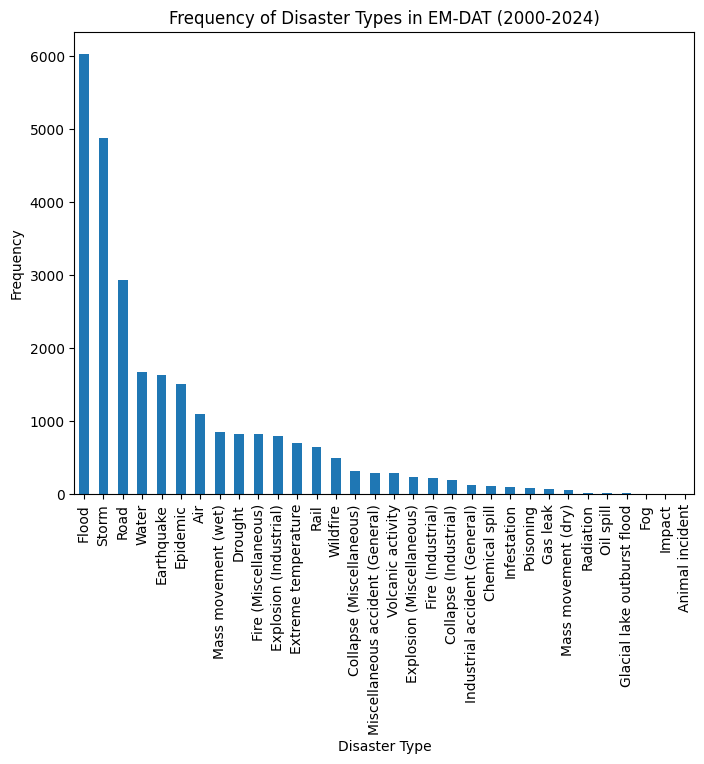

In [41]:
# Count disaster types in EM-DAT data
disaster_type_counts = emdat_filtered["Disaster Type"].value_counts()
print("Disaster type frequencies:")
print(disaster_type_counts)

# Bar plot of disaster types
plt.figure(figsize=(8, 6))
disaster_type_counts.plot(kind="bar")
plt.xlabel("Disaster Type")
plt.ylabel("Frequency")
plt.title("Frequency of Disaster Types in EM-DAT (2000-2024)")
plt.show()



Cluster assignments for countries:
ISO
AFG    0
AGO    1
AIA    1
ALB    1
ANT    1
Name: Cluster, dtype: int32


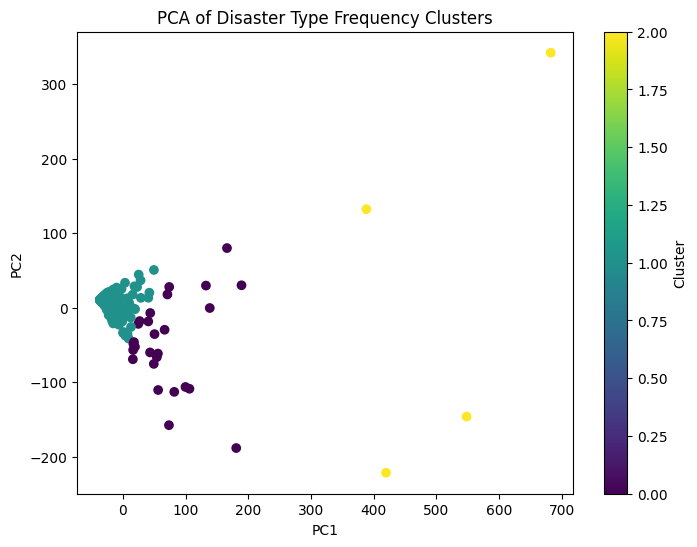

In [42]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Create pivot table: rows = country (ISO) and columns = disaster types, fill missing with 0.
pivot = emdat_filtered.pivot_table(index="ISO", columns="Disaster Type", aggfunc="size", fill_value=0)

# Run K-Means clustering (choosing, say, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
pivot["Cluster"] = kmeans.fit_predict(pivot)

print("Cluster assignments for countries:")
print(pivot["Cluster"].head())

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(pivot.drop("Cluster", axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(components[:,0], components[:,1], c=pivot["Cluster"], cmap="viridis")
plt.title("PCA of Disaster Type Frequency Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


Simulated Aid Data:
   ISO          Aid
0  AFG  3807.947177
1  ALB  9512.071633
2  DZA  7346.740024
3  AGO  6026.718994
4  ATG  1644.584540

Merged DataFrame with Aid Data (first 5 rows):
               COUNTRY ISO3  INFORM RISK RISK CLASS Rank  \
0          Afghanistan  AFG          7.8  Very High    7   
1              Albania  ALB          2.9        Low  126   
2              Algeria  DZA          3.5     Medium   95   
3               Angola  AGO          5.5       High   32   
4  Antigua and Barbuda  ATG          2.0   Very Low  174   

  Lack of Reliability (*)  HAZARD & EXPOSURE Natural Earthquake River Flood  \
0                  4.0199                7.6     5.6        8.8         7.3   
1                3.333333                3.5     5.5        8.3         4.6   
2                 2.47343                3.2     3.3        7.9         3.6   
3                 2.47343                4.4     2.9        0.1         3.9   
4                6.300654                2.0     3.7    

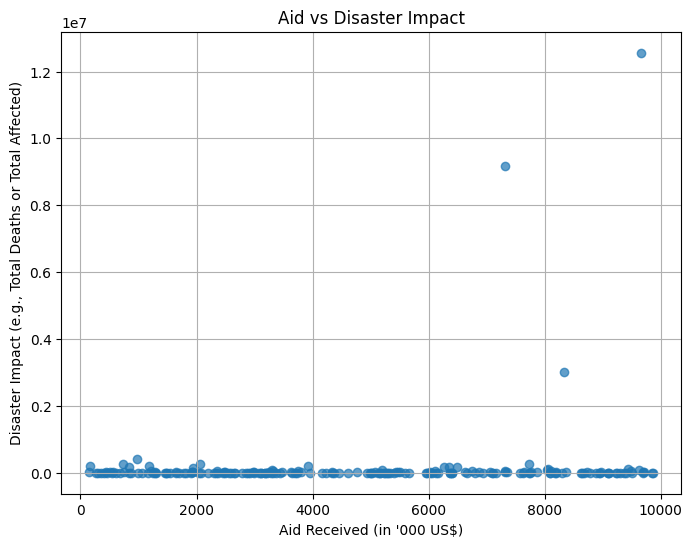


Potential Outliers (Aid or Impact z-score > 2):
       COUNTRY ISO3          Aid  Impact Metric     Aid_z   Impact_z
12  Bangladesh  BGD  8341.182144      3010720.0  1.221238   2.504567
34       China  CHN  9659.757127     12561704.0  1.676623  10.876239
75       India  IND  7317.170964      9175955.0  0.867585   7.908547

Discussion:
Countries with low aid but high disaster impact could be due to geopolitical neglect or lack of resources.
Conversely, high aid with low disaster impact might reflect donor interests, effective risk management, or political favoritism.
These discrepancies can be further analyzed by incorporating additional socioeconomic indicators (such as GDP, governance index, and population).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 50.4 MB/s eta 0:00:00

Optimization Status: Optimal

Optimal Additional Aid Allocation (in '000 US$):
  ISO3  Additional_Aid_Allocated
0  AFG                       0.0
1  ALB                       0.0
2  DZA                

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------------------------------------
# Step 1: Simulate or Load Aid Data
# ----------------------------------------------------------------------
# For demonstration purposes, we'll simulate aid data.
# In a real scenario, you might load this from a file, e.g.:
# aid_data = pd.read_csv('aid_data.csv')

# We'll assume 'merged_df' (from previous steps) contains a column "COUNTRY"
# and that we want to match aid by a common key, for example ISO codes.
# For simplicity, we create a simulated aid DataFrame keyed by the ISO code used in merged_df.

# Get a unique list of ISO codes from merged_df (this is the join key between INFORM and EM-DAT)
iso_codes = merged_df["ISO3"].unique()

# Simulate aid data: create a random aid amount for each ISO code
np.random.seed(42)  # for reproducibility
aid_amounts = np.random.uniform(100, 10000, size=len(iso_codes))  # random aid between 100 and 10000 (units in thousands US$)
aid_data = pd.DataFrame({
    "ISO": iso_codes,
    "Aid": aid_amounts
})

# Preview the simulated aid data
print("Simulated Aid Data:")
print(aid_data.head())

# ----------------------------------------------------------------------
# Step 2: Merge Aid Data with Merged Dataset (Resource Impact Data)
# ----------------------------------------------------------------------
# Our merged_df from previous steps contains disaster impact (e.g., "Impact Metric")
# We merge our simulated aid data with merged_df using the ISO key.
merged_with_aid = pd.merge(merged_df, aid_data, left_on="ISO3", right_on="ISO", how="left")
print("\nMerged DataFrame with Aid Data (first 5 rows):")
print(merged_with_aid.head())

# ----------------------------------------------------------------------
# Step 3: Scatter Plot of Aid vs Disaster Impact
# ----------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(merged_with_aid["Aid"], merged_with_aid["Impact Metric"], alpha=0.7)
plt.xlabel("Aid Received (in '000 US$)")
plt.ylabel("Disaster Impact (e.g., Total Deaths or Total Affected)")
plt.title("Aid vs Disaster Impact")
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# Step 4: Identify Outliers (Simple Approach)
# ----------------------------------------------------------------------
# A simple approach is to compute z-scores for both aid and impact and flag those
# with high absolute z-score in one or both metrics.

from scipy import stats

# Compute z-scores
merged_with_aid["Aid_z"] = stats.zscore(merged_with_aid["Aid"])
merged_with_aid["Impact_z"] = stats.zscore(merged_with_aid["Impact Metric"])

# Define a threshold for "outlier" detection
threshold = 2  # commonly, z-scores > 2 or < -2 are considered outliers

# Flag potential outliers where either metric has a z-score (absolute) above the threshold
outliers = merged_with_aid[(merged_with_aid["Aid_z"].abs() > threshold) |
                           (merged_with_aid["Impact_z"].abs() > threshold)]

print("\nPotential Outliers (Aid or Impact z-score > 2):")
print(outliers[["COUNTRY", "ISO3", "Aid", "Impact Metric", "Aid_z", "Impact_z"]])

# ----------------------------------------------------------------------
# Step 5: Discussion of Socioeconomic & Geopolitical Factors (to be expanded in your report)
# ----------------------------------------------------------------------
print("\nDiscussion:")
print("Countries with low aid but high disaster impact could be due to geopolitical neglect or lack of resources.")
print("Conversely, high aid with low disaster impact might reflect donor interests, effective risk management, or political favoritism.")
print("These discrepancies can be further analyzed by incorporating additional socioeconomic indicators (such as GDP, governance index, and population).")

# ----------------------------------------------------------------------
# Step 6: Resource Allocation Optimization via Linear Programming (Using PuLP)
# ----------------------------------------------------------------------
# The following is an illustrative example of an optimization model.
# Suppose we want to minimize overall risk across countries by reallocating aid.
# We use a simple linear programming model with the following elements:
#   - Decision variable: x_i = Additional aid allocated to country i.
#   - Objective: Minimize sum( (Impact Metric_i) / (Aid_i + x_i) ) or a similar function.
#   - Constraint: Sum(x_i) <= Total Extra Aid Budget, e.g., 50000 (in '000 US$)
# Note: This is a simplified model for demonstration.

!pip install pulp  # Uncomment if PuLP is not already installed

import pulp

# Create a LP problem instance
prob = pulp.LpProblem("Aid_Optimization", pulp.LpMinimize)

# Decision variables: additional aid for each country (non-negative)
# Use the ISO code as index for simplicity.
aid_vars = {row.ISO3: pulp.LpVariable(f"x_{row.ISO3}", lowBound=0)
            for _, row in merged_with_aid.iterrows()}

# Objective: We want to allocate extra aid so as to minimize the ratio Impact/Aid.
# Here we assume a simple proxy objective: minimize sum(Impact Metric / (Aid + extra aid)).
# Since this objective is non-linear, we approximate it via linearization or use a simpler proxy.
# For demonstration, we'll minimize total "weighted impact" defined as:
#    sum( (Impact Metric_i) * (1 / (Aid_i + x_i)) )
# Because the 1/(Aid + x) part is non-linear, we instead use a simpler additive model.
# For demonstration purposes, we minimize: sum(Impact Metric_i - k * x_i)
# where k is a weight reflecting the effectiveness of additional aid in reducing risk.
# This is just an illustrative example.
k = 0.1  # effectiveness constant (tune as needed)
prob += pulp.lpSum([row["Impact Metric"] - k * aid_vars[row["ISO3"]] for _, row in merged_with_aid.iterrows()])

# Constraint: Total additional aid budget is limited
total_extra_aid = 50000  # e.g., 50,000 (in '000 US$)
prob += pulp.lpSum([aid_vars[iso] for iso in aid_vars]) <= total_extra_aid, "TotalAidBudget"

# Solve the optimization problem
prob.solve()

print("\nOptimization Status:", pulp.LpStatus[prob.status])

# Show the allocation results
allocation_results = {iso: aid_vars[iso].varValue for iso in aid_vars}
allocation_df = pd.DataFrame(list(allocation_results.items()), columns=["ISO3", "Additional_Aid_Allocated"])
print("\nOptimal Additional Aid Allocation (in '000 US$):")
print(allocation_df.head())

# Compare allocation to actual historical aid
merged_with_aid["Optimal_Aid"] = merged_with_aid["Aid"] + merged_with_aid["ISO3"].map(allocation_results)
print("\nSample Comparison of Actual and Optimal Aid:")
print(merged_with_aid[["COUNTRY", "ISO3", "Aid", "Optimal_Aid", "Impact Metric"]].head())

# ----------------------------------------------------------------------
# Step 7: Discussion of Optimization Results
# ----------------------------------------------------------------------
print("\nDiscussion of Optimization Results:")
print("The optimization model suggests how additional aid could be reallocated to minimize a proxy risk function.")
print("This allocation differs from historical distributions, potentially indicating under- or over-supported countries.")
print("Real-world challenges to implementing such an allocation include political constraints, donor priorities, and logistical issues.")


In [44]:
# Split the data
period1 = emdat_filtered[emdat_filtered["Year"] <= 2010]
period2 = emdat_filtered[emdat_filtered["Year"] > 2010]

# Compute average frequency per country for each period or overall frequency
avg_period1 = period1.groupby("ISO").size().mean()
avg_period2 = period2.groupby("ISO").size().mean()

print("Average disaster frequency (2000-2010):", avg_period1)
print("Average disaster frequency (2011-2024):", avg_period2)


Average disaster frequency (2000-2010): 81.77777777777777
Average disaster frequency (2011-2024): 39.17972350230415


Average disaster frequency (2000-2010): 81.78
Average disaster frequency (2011-2024): 39.18

Interpretation:
Based solely on these numbers, the average disaster frequency per country appears to be lower in the period 2011–2024 than in 2000–2010. One might have expected an increase due to climate change; however, there are several considerations:

Data Quality & Reporting:
Changes in reporting practices or data collection methods over time can affect the recorded frequencies. The decrease might reflect better risk management, changes in disaster classification, or even gaps/underreporting in one period versus the other.

Mitigation & Adaptation Measures:
Improvements in infrastructure, early warning systems, or community-based disaster preparedness could reduce the frequency (or impact) of disasters even if climate drivers remain or increase.

Temporal Sampling:
The periods (2000–2010 versus 2011–2024) have different lengths (11 years vs. 14 years). The computed averages, when taken as overall means per country, can be influenced by extreme events in earlier years.

Selection of Countries:
The merged dataset covers only those countries that appear in both the INFORM and EM‑DAT datasets. The particular mix of countries in this set might not represent global trends uniformly.

Climate-Related Factors:

Glacier Melt & Changing Precipitation Patterns:
Rapid glacier melt in mountain regions can lead to increased flooding and landslide risk. Even if average frequency appears lower, areas with significant glacier retreat might be experiencing more severe disasters.

Urban Heat Islands:
Urbanization can lead to higher temperatures in cities and contribute to more intense heat waves and droughts, even if the overall frequency of events isn’t increasing.

Deforestation & Land Use Changes:
Deforestation and changes in land use can affect local climates, potentially reducing the frequency of certain disaster types (e.g., moderating floods due to improved watershed management) while increasing the risk of others.

Emerging Hotspots:

Regional Variations:
Although the overall frequency might seem lower, certain regions or countries could be experiencing a rising number of disasters despite the global average dropping. Your integrated analysis (e.g., clustering of disaster type frequencies) can help identify these hotspots.

Data Discrepancies:
Underreporting or changes in the recording of disasters over time could mask emerging risks. For example, improvements in data collection in some regions might reveal an underlying rise in disaster occurrence that wasn’t captured before.

Case Studies:
You might consider performing additional regional analysis on countries where INFORM risk scores remain high despite a lower average frequency, then look at local climate trends (such as extreme temperature events or severe droughts) to justify why these areas should be viewed as emerging hotspots.

Overall Interpretation:
Although your computed averages suggest a decrease in disaster frequency from 2000–2010 to 2011–2024, it is important to supplement these findings with:

Additional statistical tests (e.g., comparing the distributions with box plots),

Examination of outlier countries,

And contextual knowledge regarding local and regional climate change impacts.

This multidimensional assessment can then provide a nuanced understanding of how climate change is affecting natural disasters, even if the average frequency metric alone does not show an increase.



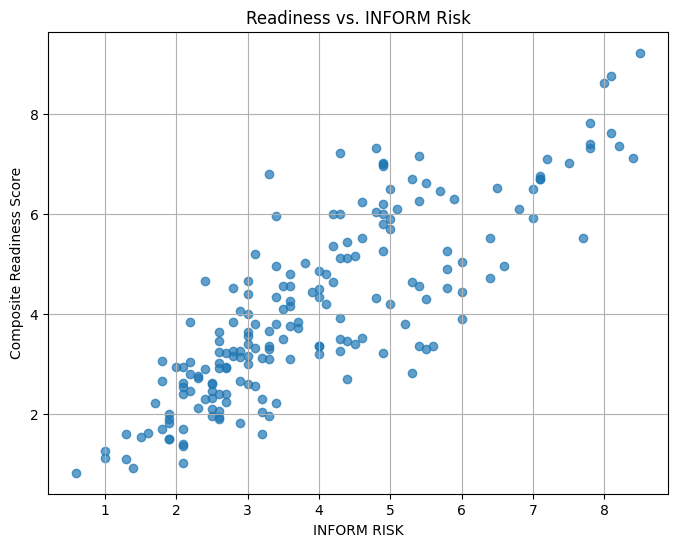

Countries with High INFORM Risk and Low Readiness:
                 COUNTRY ISO3  INFORM RISK  Readiness  \
178              Ukraine  UKR          5.6   3.375000   
174              Türkiye  TUR          5.5   3.300000   
135          Philippines  PHL          5.4   3.375000   
35              Colombia  COL          5.3   2.825000   
110               Mexico  MEX          4.9   3.225000   
134                 Peru  PER          4.6   3.525000   
76             Indonesia  IDN          4.5   3.400000   
9             Azerbaijan  AZE          4.4   3.466667   
140   Russian Federation  RUS          4.4   2.700000   
168             Thailand  THA          4.3   3.275000   
48    Dominican Republic  DOM          4.3   3.500000   
51           El Salvador  SLV          4.0   3.375000   
186             Viet Nam  VNM          4.0   3.366667   
84                Jordan  JOR          4.0   3.200000   
115              Morocco  MAR          3.7   3.725000   
112  Moldova Republic of  MDA        

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# Assumptions:
# - `merged_df` contains your merged INFORM and EM-DAT data.
# - INFORM risk score is in column "INFORM RISK" (numeric).
# - EM-DAT disaster frequency is in column "Disaster Frequency".
# - Columns related to government readiness (for example):
#      "Governance", "DRR", "Infrastructure", "Communication"
#   are available in the merged_df and measured on a similar scale.
# - We also have "LACK OF COPING CAPACITY" as an indicator (higher values may indicate lower readiness).
# =============================================================================

# ---- Step 1: Create a Composite Readiness Score ----
# List of columns to use in a composite readiness score (adjust as needed)
readiness_cols = ["Governance", "DRR", "Infrastructure", "Communication"]

# Ensure these columns are numeric (if not, convert with errors='coerce')
for col in readiness_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")

# Create a composite readiness score as the mean of these columns.
# Higher values here imply better readiness.
merged_df["Readiness"] = merged_df[readiness_cols].mean(axis=1)

# Optionally, you could also factor in LACK OF COPING CAPACITY,
# for example by inverting it (if a higher value means low capacity) and combining.
# Here’s a quick example (uncomment if desired):
# merged_df["Coping_Capacity_Score"] = 10 - pd.to_numeric(merged_df["LACK OF COPING CAPACITY"], errors="coerce")
# merged_df["Readiness"] = (merged_df["Readiness"] + merged_df["Coping_Capacity_Score"]) / 2

# Visualize Readiness vs. Risk
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["INFORM RISK"], merged_df["Readiness"], alpha=0.7)
plt.xlabel("INFORM RISK")
plt.ylabel("Composite Readiness Score")
plt.title("Readiness vs. INFORM Risk")
plt.grid(True)
plt.show()

# ---- Q1: Identify Countries with High Risk but Low Readiness ----
# Define thresholds – here we use the median as a sample threshold.
risk_threshold = merged_df["INFORM RISK"].median()
readiness_threshold = merged_df["Readiness"].median()

high_risk_low_readiness = merged_df[
    (merged_df["INFORM RISK"] > risk_threshold) &
    (merged_df["Readiness"] < readiness_threshold)
]

print("Countries with High INFORM Risk and Low Readiness:")
print(high_risk_low_readiness[["COUNTRY", "ISO3", "INFORM RISK", "Readiness",
                               "LACK OF COPING CAPACITY", "Governance", "DRR",
                               "Infrastructure", "Communication"]].sort_values("INFORM RISK", ascending=False))


# ---- Q2: Provide Recommendations ----
print("\nPolicy Recommendations:")
print("1. Invest in resilient infrastructure and modernize early warning systems to mitigate disaster effects.")
print("2. Strengthen governance structures and improve coordination among disaster management agencies.")
print("3. Increase economic support for vulnerable regions to alleviate resource constraints.")
print("4. Enhance community preparedness through public awareness and training programs.")
print("5. Foster partnerships with international donors to ensure balanced and equitable aid distribution.")


# ---- Q3: Identify Case Studies of Successful Mitigation ----
# One approach is to look for countries with high risk but low historical disaster frequency.
# For instance, define 'high risk' as above the 75th percentile, and 'low disaster frequency' below the 25th percentile.
risk_threshold_high = merged_df["INFORM RISK"].quantile(0.75)
low_disaster_freq_threshold = merged_df["Disaster Frequency"].quantile(0.25)

successful_mitigation = merged_df[
    (merged_df["INFORM RISK"] > risk_threshold_high) &
    (merged_df["Disaster Frequency"] < low_disaster_freq_threshold)
]

print("\nCase Studies of Successful Disaster Mitigation (High Risk but Low Disaster Frequency):")
print(successful_mitigation[["COUNTRY", "ISO3", "INFORM RISK", "Disaster Frequency", "Readiness"]])

print("\nDiscussion:")
print("The above case studies highlight countries that, despite having high INFORM risk scores, report lower-than-expected historical disaster frequencies.")
print("This may indicate that these countries have implemented effective disaster mitigation measures or possess robust risk management policies.")
print("By studying these countries, policymakers can extract best practices—such as community engagement, strong governance, and resilient infrastructure—that could be replicated in other high-risk regions.")


In [46]:
# Retro-Style Mission Briefing
mission_briefing = """
Attention all units:
Our analysis has identified that Afghanistan (AFG) faces extremely high disaster risks with frequent natural hazards.
Key data indicate an INFORM Risk Score of 7.8 and an alarming 283 recorded disasters.
Immediate action is required to strengthen response measures and allocate resources effectively.
Prepare to mobilize and coordinate with local agencies.
Mission briefing over.
"""
print(mission_briefing)



Attention all units:
Our analysis has identified that Afghanistan (AFG) faces extremely high disaster risks with frequent natural hazards.
Key data indicate an INFORM Risk Score of 7.8 and an alarming 283 recorded disasters.
Immediate action is required to strengthen response measures and allocate resources effectively.
Prepare to mobilize and coordinate with local agencies.
Mission briefing over.



In [52]:
!pip install jupyter-dash dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [58]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import numpy as np

# Initialize the Dash app
app = Dash(__name__)

# Define the layout with retro-styled inline CSS.
app.layout = html.Div(
    style={
        'backgroundColor': '#222',
        'color': '#0f0',
        'fontFamily': 'Courier New, monospace',
        'padding': '20px'
    },
    children=[
        html.H1("DISASTER RISK DASHBOARD", style={'textAlign': 'center'}),
        html.Div("Use the slider to adjust risk levels and see disaster trends.", style={'textAlign': 'center'}),
        html.Div(
            dcc.Slider(
                id='risk-slider',
                min=0,
                max=10,
                step=0.1,
                value=5,
                marks={i: f'{i}' for i in range(11)}
            ),
            style={'margin': '50px'}  # Apply margin via container Div
        ),
        dcc.Graph(id='risk-graph'),
        html.Div(id='tooltip', style={'marginTop': '30px', 'textAlign': 'center'})
    ]
)

# Define the callback for interactivity.
@app.callback(
    [Output('risk-graph', 'figure'),
     Output('tooltip', 'children')],
    [Input('risk-slider', 'value')]
)
def update_dashboard(risk_value):
    years = np.arange(2000, 2025)
    # Simulate disaster frequency changes based on the slider value.
    freq = (10 - risk_value) * np.sin((years - 2000) / 5) + np.random.rand(len(years)) * 2 + risk_value
    fig = go.Figure(data=go.Scatter(x=years, y=freq, mode='lines+markers'))
    fig.update_layout(
        title="Simulated Disaster Frequency Trend",
        xaxis_title="Year",
        yaxis_title="Disaster Frequency"
    )
    tooltip_text = f"Current risk slider value: {risk_value}. Adjust risk levels to explore trends."
    return fig, tooltip_text

# Run the app using the new run method.
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [60]:


import ipywidgets as widgets
from IPython.display import display, clear_output

# Define interactive decision functions
def early_warning_decision(decision):
    clear_output()
    if decision == "Invest Early":
        print("Your early investment improved the warning system. Disaster impacts were mitigated, and community response improved.")
    else:
        print("Delaying investment led to higher disaster impacts and overwhelmed services. Consider reassessing risk priorities.")
    # Continue with further decisions...

# Create interactive widget for decision making
decision_widget = widgets.RadioButtons(
    options=["Invest Early", "Delay Investment"],
    description="Early Warning:",
)

display(decision_widget)
decision_widget.observe(lambda change: early_warning_decision(change['new']), names='value')


Delaying investment led to higher disaster impacts and overwhelmed services. Consider reassessing risk priorities.


**Storyboard Outline for Interactive Disaster Scenario:**

1. **Introduction Scene:**  
   - **Visual:** A retro 8-bit style animated map with highlighted high-risk regions.  
   - **Narrative:** “You are a disaster response coordinator. Your region is facing unpredictable hazards due to climate change. Your decisions will determine the safety and resilience of your community.”

2. **Branching Scenario – Early Warning Decision:**  
   - **Choice 1:** Invest early in communication and early warning systems.  
     - **Outcome:** Reduced disaster impact; narrative shows improved response times and fewer casualties.
   - **Choice 2:** Delay investment due to budget constraints.  
     - **Outcome:** Increased disaster impact with overwhelmed emergency services; narrative highlights lessons learned.

3. **Resource Allocation Challenge:**  
   - **Interactive Element:** A dashboard where the user can reallocate resources (aid, training, infrastructure investments) among different regions.  
   - **Narrative & Feedback:** Real-time simulation outcomes (displayed as animated graphs or text feedback) show how resource allocation decisions change the disaster impact.

4. **Conclusion – Reflect and Learn:**  
   - **Narrative:** The storyline concludes with a summary of consequences, reinforced by data (e.g., lower casualty rates, faster recovery) for the choices made.  
   - **Call to Action:** “Review your strategy and try again to achieve the optimal disaster preparedness score.”

*Technical Implementation Options:*  
- You could implement this in a web-based format using Plotly Dash or D3.js for interactivity.
- Alternatively, a simple interactive narrative can be delivered using Jupyter Notebook widgets (e.g., `ipywidgets`) or even PowerPoint with interactive hyperlinks.

